Code derived from TF tutorial at: https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from   tensorflow.keras import Sequential
from   tensorflow.keras.datasets import fashion_mnist
from   tensorflow.keras.layers import Dense, Flatten, Softmax
from   tensorflow.keras.losses import SparseCategoricalCrossentropy

tf.__version__

'2.4.1'

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Pants', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
X_train.shape, len(y_train)

((60000, 28, 28), 60000)

In [5]:
X_test.shape, len(y_test)

((10000, 28, 28), 10000)

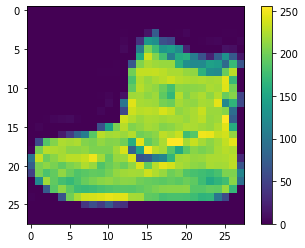

In [6]:
plt.imshow(X_train[0])
plt.colorbar();

In [7]:
X_train = X_train / 255.
X_test = X_test / 255.

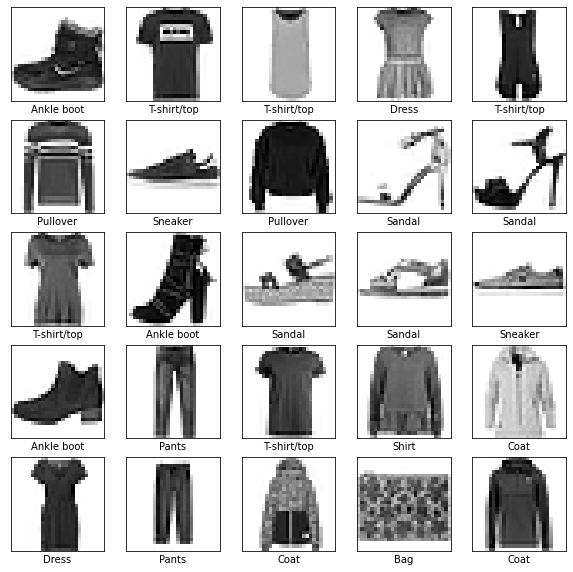

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [9]:
input_shape = X_train[0].shape
n_classes = len(class_names)

In [10]:
mod = Sequential([Flatten(input_shape=input_shape), 
                  Dense(128, activation='relu'),
                  Dense(n_classes)])

In [11]:
mod.compile(optimizer='adam', 
            loss=SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [12]:
mod.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 597us/step - loss: 0.6291 - accuracy: 0.7808
Epoch 2/10
1875/1875 [==============================] - 1s 589us/step - loss: 0.3799 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 1s 593us/step - loss: 0.3360 - accuracy: 0.8786
Epoch 4/10
1875/1875 [==============================] - 1s 601us/step - loss: 0.3114 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 1s 588us/step - loss: 0.2936 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 1s 592us/step - loss: 0.2774 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 1s 587us/step - loss: 0.2674 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 1s 588us/step - loss: 0.2550 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 1s 587us/step - loss: 0.2473 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 1s 589u

In [13]:
test_loss, test_acc = mod.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3376 - accuracy: 0.8842


In [14]:
prob_mod = Sequential([mod, Softmax()])
preds = prob_mod.predict(X_test)

In [15]:
preds[0]

array([1.4111462e-06, 3.0261468e-10, 1.2743404e-08, 3.4861042e-10,
       4.1091116e-08, 1.5240379e-03, 2.5425265e-07, 1.0685014e-02,
       6.9189234e-08, 9.8778909e-01], dtype=float32)

In [16]:
np.argmax(preds[0])

9

In [17]:
y_test[0]

9

In [27]:
def plot_img(i, preds, actual, img):
    actual, img = actual[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    pred_label = np.argmax(preds)
    color = 'green' if pred_label == actual else 'red'
    plt.xlabel(
        (f'{class_names[pred_label]} {100 *  np.max(preds):.02f} '
         f'({class_names[actual]})'),
        color=color)

In [28]:
def plot_val_array(i, preds, actual):
    actual = actual[i]
    plt.xticks(range(10))
    plt.yticks([])
    this_plot = plt.bar(range(10), preds, color='#777777')
    plt.ylim([0, 1])
    pred_label = np.argmax(preds)
    this_plot[pred_label].set_color('red')
    this_plot[actual].set_color('green')

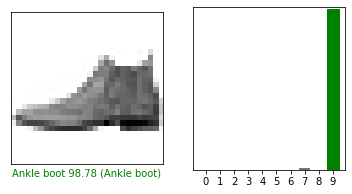

In [29]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(121)
plot_img(i, preds[i], y_test, X_test)

plt.subplot(122)
plot_val_array(i, preds[i], y_test)

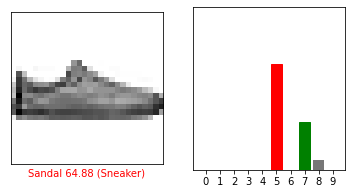

In [30]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(121)
plot_img(i, preds[i], y_test, X_test)

plt.subplot(122)
plot_val_array(i, preds[i], y_test)

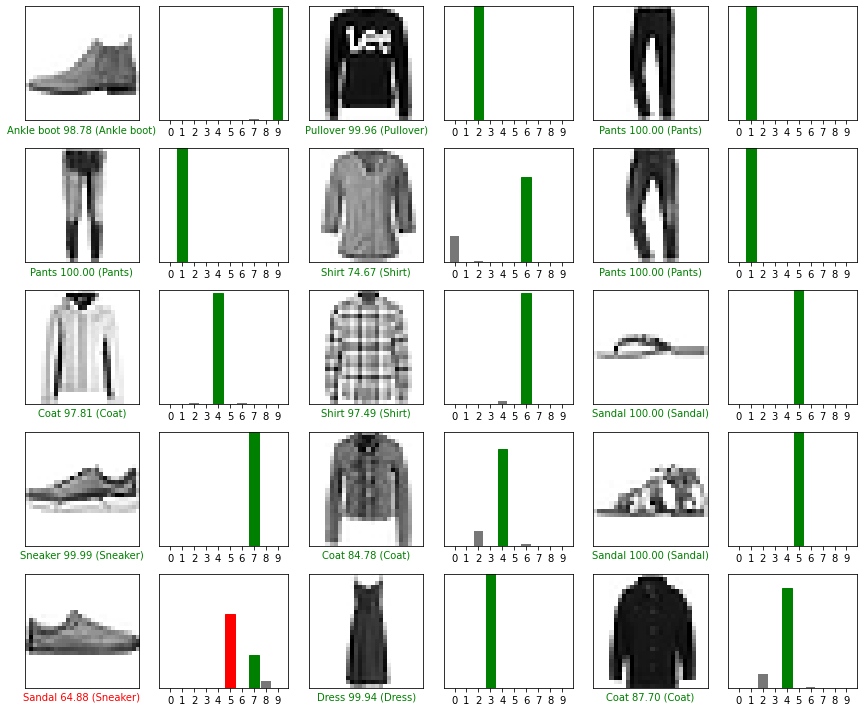

In [34]:
n_rows = 5
n_cols = 3
n_img = n_rows * n_cols

plt.figure(figsize=(2*2*n_cols, 2*n_rows))
for i in range(n_img):
    plt.subplot(n_rows, 2*n_cols, 2*i + 1)
    plot_img(i, preds[i], y_test, X_test)
    plt.subplot(n_rows, 2*n_cols, 2*i + 2)
    plot_val_array(i, preds[i], y_test)
plt.tight_layout()

In [35]:
img = X_test[1]
img.shape

(28, 28)

In [36]:
# Add to batch (even if just one img)
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [37]:
pred = prob_mod.predict(img)
pred

array([[7.5446615e-06, 1.9127093e-14, 9.9958307e-01, 2.7122002e-10,
        3.5804653e-04, 2.1037756e-14, 5.1301442e-05, 6.8783188e-22,
        1.3813369e-12, 2.2211419e-16]], dtype=float32)

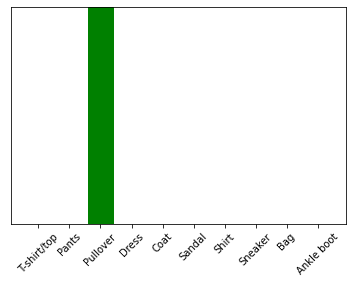

In [40]:
plot_val_array(1, pred[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

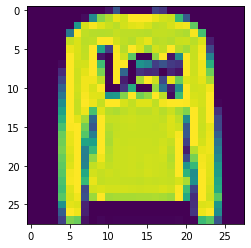

In [42]:
plt.imshow(img[0, :, :]);

License from source:
```
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
```